# Week2-Assignment02-Embedding

In [1]:
import os
import openai
from dotenv import load_dotenv
load_dotenv()

# Set up Azure OpenAI
openai.api_type = "azure"
openai.api_version = "2023-07-01-preview"

# OpenAI Key
API_KEY = os.getenv("AZURE_OPENAI_API_KEY","").strip()
assert API_KEY, "ERROR: Azure OpenAI Key is missing"
openai.api_key = API_KEY

# OpenAI Endpoint
RESOURCE_ENDPOINT = os.getenv("AZURE_OPENAI_API_BASE","").strip()
assert RESOURCE_ENDPOINT, "ERROR: Azure OpenAI Endpoint is missing"
assert "openai.azure.com" in RESOURCE_ENDPOINT.lower(), "ERROR: Azure OpenAI Endpoint should be in the form: \n\n\t<your unique endpoint identifier>.openai.azure.com"
openai.api_base = RESOURCE_ENDPOINT

In [2]:
! pip install pandas

In [3]:
import pandas as pd

df_orig = pd.read_csv("C:/Users/joann/Downloads/Notes/Open AI/AzureAI_WK02/Homework_Week2/Louis/data/bbc/bbc-news-data.csv", delimiter='\t')
df = df_orig.copy()
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [ ]:
import time
df['embedding'] = ''

for i in range(len(df)):    
     while True:
         try:
             embedding = openai.Embedding.create(input=df['content'][i], deployment_id=os.getenv("EMBEDDINGS_NAME"))
             df['embedding'][i] = embedding['data'][0]['embedding']
             break
         except Exception as err:
             print(f"Unexpected {err=}, {type(err)=}")
             time.sleep(5)

#Save Embeddings
df.to_csv("C:/Users/joann/Downloads/Notes/Open AI/AzureAI_WK02/Homework_Week2/bbc-news-data-embedding.csv", sep='\t', index=False)

# Load all embeddings

In [9]:
import numpy as np

# Load small embeddings dataset
df = pd.read_csv("C:/Users/joann/Downloads/Notes/Open AI/AzureAI_WK02/Homework_Week2/Louis/data/bbc/bbc-news-data-embedding_small.csv", sep='\t')

# convert string to array
df["embedding"] = df['embedding'].apply(eval).apply(np.array)

# Visualize embeddings

In [14]:
! pip install numpy scipy scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 262.6 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 372.4 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 355.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.3 MB ? eta -:--:--
   ---------------------------------------- 0.2/44.3 MB 6.9 MB/s eta 0:00:07
   - -------------------------------------- 1.2/44.3 MB 15.5 MB/s eta 0:00:03
   -- ------------------------------------- 3.3/44.3 MB 26.5 MB/s eta 0:00:02
   ---- ----------------------------------- 4.7/44.3 MB 27.1 MB/s eta 0:00:02
   ----- ---------------------------------- 6.4/44.3 MB 29.3 MB/s eta 0:00:02
   ------- -------------------------------- 7.8/44.3 MB 27.5 MB/s eta 0:00:02
   -------- ------------------------------- 9.1/44.3 MB 27.7 MB/s eta 0:00:02


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
vis_dims_pca = pca.fit_transform(df['embedding'].to_list())
vis_dims_pca.shape
# vis_dims_pca

df["vis_dims_pca"] = vis_dims_pca.tolist()

In [20]:
! pip install matplotlib

     ---------------------------------------- 0.0/158.1 kB ? eta -:--:--
     -- ------------------------------------- 10.2/158.1 kB ? eta -:--:--
     -------------------------------------- 158.1/158.1 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.9/7.6 MB 18.7 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/7.6 MB 22.9 MB/s eta 0:00:01
   ------------------ --------------------- 3.5/7.6 MB 27.9 MB/s eta 0:00:01
   -------------------------------- ------- 6.2/7.6 MB 35.8 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.6 MB 34.8 MB/s eta 0:00:01
   ---------------------------------------- 7.6/7.6 MB 30.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/181.9 kB ? eta -:--:--
   ---------------------------------------- 181.9/181.9 kB ? eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------

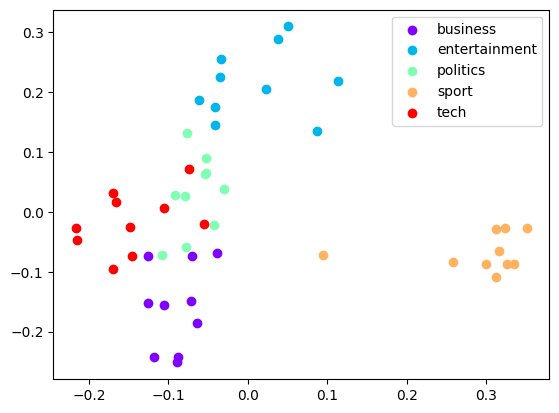

In [21]:
import matplotlib.pyplot as plt

### Now we visualize the reduced data in 2D plot
df[['x', 'y']] = pd.DataFrame(df['vis_dims_pca'].to_list(), index=df.index)

# Create a scatter plot with colors determined by 'category'
categories = df['category'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(categories)))

for i, category in enumerate(categories):
    df_category = df[df['category'] == category]
    plt.scatter(df_category['x'], df_category['y'], color=colors[i], label=category)

plt.legend()
plt.show()

# Classify news

In [23]:
df = pd.read_csv("C:/Users/joann/Downloads/Notes/Open AI/AzureAI_WK02/Homework_Week2/Louis/data/bbc/bbc-news-data-embedding_full.csv", sep='\t') 
df["embedding"] = df['embedding'].apply(eval).apply(np.array)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['embedding'], df['category'], test_size=0.2, random_state=42)

In [25]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.to_list(), y_train.to_list())

KNeighborsClassifier()

In [26]:
# predict
y_pred = knn.predict(X_test.to_list())

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[108   0   5   0   2]
 [  2  68   0   0   2]
 [  0   0  75   0   1]
 [  1   0   0 101   0]
 [  1   2   2   0  75]]
               precision    recall  f1-score   support

     business       0.96      0.94      0.95       115
entertainment       0.97      0.94      0.96        72
     politics       0.91      0.99      0.95        76
        sport       1.00      0.99      1.00       102
         tech       0.94      0.94      0.94        80

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



Homework question #1: In this model, how many business news has been falsely identified as tech news?

Answer: There's 6% of business news has been falsely ideentified. (My Question: How do we know it has been falsely identified as tech news?)

Homework question #2: Explain what does 0.96 precision mean for business class?

Answer: It correctly identified as being business news out of (correctly identified + falsely identified as being business news).

Homework question #3: Explain what does 0.94 recall mean for tech?

Answer: It correctly identified as being tech news out of all the real business news.

Homework question #4: Find a case where we need to recall as metric to measure model performance?

Answer: 